In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("vitamin_deficiency_disease_dataset.csv")

df.head(10)


,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,NaN,Active,Vegetarian,High,High,Mid,...,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,...,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,1,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,NaN,Moderate,Vegetarian,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
5,69,Female,25.1,Never,Moderate,Active,Pescatarian,Moderate,Low,Mid,...,1,0,0,0,0,1,0,0,Anemia,1
6,31,Male,25.3,Former,Heavy,Light,Vegetarian,Low,Low,High,...,0,0,0,1,0,0,1,0,Rickets_Osteomalacia,1
7,73,Female,28.1,Former,Heavy,Active,Vegetarian,Low,High,Mid,...,0,0,0,1,1,0,0,0,Rickets_Osteomalacia,0
8,59,Male,19.3,Current,Heavy,Sedentary,Omnivore,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
9,18,Male,30.4,Current,Moderate,Light,Pescatarian,High,High,Low,...,0,1,0,0,0,0,0,0,Anemia,0


In [3]:
df["disease_diagnosis"].value_counts()

disease_diagnosis
Healthy                 1509
Anemia                  1245
Rickets_Osteomalacia    1029
Night_Blindness          122
Scurvy                    95
Name: count, dtype: int64

*REPLACING EMPTY VALUES WITH "NONE"*


In [4]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')


In [5]:
df['symptoms_list'] = df['symptoms_list'].fillna('None')


In [6]:
df.head(20)

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,None,Active,Vegetarian,High,High,Mid,...,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,...,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,1,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,None,Moderate,Vegetarian,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
5,69,Female,25.1,Never,Moderate,Active,Pescatarian,Moderate,Low,Mid,...,1,0,0,0,0,1,0,0,Anemia,1
6,31,Male,25.3,Former,Heavy,Light,Vegetarian,Low,Low,High,...,0,0,0,1,0,0,1,0,Rickets_Osteomalacia,1
7,73,Female,28.1,Former,Heavy,Active,Vegetarian,Low,High,Mid,...,0,0,0,1,1,0,0,0,Rickets_Osteomalacia,0
8,59,Male,19.3,Current,Heavy,Sedentary,Omnivore,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
9,18,Male,30.4,Current,Moderate,Light,Pescatarian,High,High,Low,...,0,1,0,0,0,0,0,0,Anemia,0


#NULL VALUES DATA CHECK

In [7]:

df.isnull().sum()


age                          0
gender                       0
bmi                          0
smoking_status               0
alcohol_consumption          0
exercise_level               0
diet_type                    0
sun_exposure                 0
income_level                 0
latitude_region              0
vitamin_a_percent_rda        0
vitamin_c_percent_rda        0
vitamin_d_percent_rda        0
vitamin_e_percent_rda        0
vitamin_b12_percent_rda      0
folate_percent_rda           0
calcium_percent_rda          0
iron_percent_rda             0
hemoglobin_g_dl              0
serum_vitamin_d_ng_ml        0
serum_vitamin_b12_pg_ml      0
serum_folate_ng_ml           0
symptoms_count               0
symptoms_list                0
has_night_blindness          0
has_fatigue                  0
has_bleeding_gums            0
has_bone_pain                0
has_muscle_weakness          0
has_numbness_tingling        0
has_memory_problems          0
has_pale_skin                0
disease_

CHECKING DUPES

duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows =",duplicate_rows)  

#BASIC DF INFO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4000 non-null   int64  
 1   gender                     4000 non-null   object 
 2   bmi                        4000 non-null   float64
 3   smoking_status             4000 non-null   object 
 4   alcohol_consumption        4000 non-null   object 
 5   exercise_level             4000 non-null   object 
 6   diet_type                  4000 non-null   object 
 7   sun_exposure               4000 non-null   object 
 8   income_level               4000 non-null   object 
 9   latitude_region            4000 non-null   object 
 10  vitamin_a_percent_rda      4000 non-null   float64
 11  vitamin_c_percent_rda      4000 non-null   float64
 12  vitamin_d_percent_rda      4000 non-null   float64
 13  vitamin_e_percent_rda      4000 non-null   float

#categorical and numerical values

In [9]:
#categorical and numerical values
catvars = df.select_dtypes(include=["object"]).columns
numvars = df.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns
print("Categorical columns=", [c for c in catvars])
print("Numerical columns=", [n for n in numvars])


Categorical columns= ['gender', 'smoking_status', 'alcohol_consumption', 'exercise_level', 'diet_type', 'sun_exposure', 'income_level', 'latitude_region', 'symptoms_list', 'disease_diagnosis']
Numerical columns= ['age', 'bmi', 'vitamin_a_percent_rda', 'vitamin_c_percent_rda', 'vitamin_d_percent_rda', 'vitamin_e_percent_rda', 'vitamin_b12_percent_rda', 'folate_percent_rda', 'calcium_percent_rda', 'iron_percent_rda', 'hemoglobin_g_dl', 'serum_vitamin_d_ng_ml', 'serum_vitamin_b12_pg_ml', 'serum_folate_ng_ml', 'symptoms_count', 'has_night_blindness', 'has_fatigue', 'has_bleeding_gums', 'has_bone_pain', 'has_muscle_weakness', 'has_numbness_tingling', 'has_memory_problems', 'has_pale_skin', 'has_multiple_deficiencies']


In [10]:
for col in numvars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = np.clip(df[col], Q1 - 1.5*IQR, Q3 + 1.5*IQR)


CHECK UNIQUE VALUES

In [11]:

def uniuevals(col):
    print(f'Unique values in col \'{col}\' are: {df[col].unique()}')
    
for col in catvars:
    uniuevals(col)
    print("-"*125)

Unique values in col 'gender' are: ['Male' 'Female']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'smoking_status' are: ['Former' 'Never' 'Current']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'alcohol_consumption' are: ['None' 'Moderate' 'Heavy']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'exercise_level' are: ['Active' 'Light' 'Moderate' 'Sedentary']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'diet_type' are: ['Vegetarian' 'Omnivore' 'Pescatarian' 'Vegan']
----------------------------------------------------------------------------------------------------------------------------

In [12]:
df.head(10)


,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,None,Active,Vegetarian,High,High,Mid,...,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.3,Former,Moderate,Light,Omnivore,Low,Low,Low,...,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,0,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,None,Moderate,Vegetarian,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
5,69,Female,25.1,Never,Moderate,Active,Pescatarian,Moderate,Low,Mid,...,0,0,0,0,0,1,0,0,Anemia,1
6,31,Male,25.3,Former,Heavy,Light,Vegetarian,Low,Low,High,...,0,0,0,1,0,0,1,0,Rickets_Osteomalacia,1
7,73,Female,28.1,Former,Heavy,Active,Vegetarian,Low,High,Mid,...,0,0,0,1,1,0,0,0,Rickets_Osteomalacia,0
8,59,Male,19.3,Current,Heavy,Sedentary,Omnivore,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0
9,18,Male,30.4,Current,Moderate,Light,Pescatarian,High,High,Low,...,0,1,0,0,0,0,0,0,Anemia,0


DISPLAYING ALL 34 COLUMNS

In [13]:
pd.set_option('display.max_columns', None)
df.head(10)


,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count,symptoms_list,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,None,Active,Vegetarian,High,High,Mid,119.1,147.3,152.88,97.5,102.5,188.9,108.30,97.4,13.5,39.3,356.4,23.3,0.0,None,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.3,Former,Moderate,Light,Omnivore,Low,Low,Low,85.7,57.5,32.76,82.7,62.6,51.0,42.60,102.5,15.4,8.9,303.0,5.3,1.0,bone_pain,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,48.3,152.1,94.99,169.3,136.2,116.6,136.30,86.4,14.1,29.9,578.0,16.3,2.0,dry_skin;night_blindness,0,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,75.8,51.0,51.48,85.7,31.8,66.5,76.50,60.8,12.3,20.2,144.8,9.2,2.0,numbness_tingling;memory_problems,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,None,Moderate,Vegetarian,Moderate,High,Low,93.3,111.5,62.90,155.6,72.6,124.9,69.40,71.9,15.1,20.7,348.2,13.4,0.0,None,0,0,0,0,0,0,0,0,Healthy,0
5,69,Female,25.1,Never,Moderate,Active,Pescatarian,Moderate,Low,Mid,47.9,75.3,65.50,72.2,21.2,101.0,70.00,79.0,15.0,19.5,100.0,13.4,3.0,numbness_tingling;dry_skin;night_blindness,0,0,0,0,0,1,0,0,Anemia,1
6,31,Male,25.3,Former,Heavy,Light,Vegetarian,Low,Low,High,62.2,106.7,25.27,53.7,27.0,77.4,67.10,54.7,15.2,7.5,115.0,4.9,2.0,bone_pain;memory_problems,0,0,0,1,0,0,1,0,Rickets_Osteomalacia,1
7,73,Female,28.1,Former,Heavy,Active,Vegetarian,Low,High,Mid,129.6,138.0,42.56,70.8,50.0,162.1,151.20,120.4,14.8,12.4,238.2,20.1,2.0,bone_pain;muscle_weakness,0,0,0,1,1,0,0,0,Rickets_Osteomalacia,0
8,59,Male,19.3,Current,Heavy,Sedentary,Omnivore,Moderate,High,Low,103.3,69.6,119.40,143.7,122.8,157.3,155.50,84.9,13.5,22.1,472.8,20.8,0.0,None,0,0,0,0,0,0,0,0,Healthy,0
9,18,Male,30.4,Current,Moderate,Light,Pescatarian,High,High,Low,192.5,123.5,166.01,84.7,125.9,98.1,179.85,40.3,12.6,52.2,495.5,14.7,1.0,fatigue,0,1,0,0,0,0,0,0,Anemia,0


PLOTTING CATEGORICAL VALUES GRAPHS

C:\Users\hruth\AppData\Local\Temp\ipykernel_14724\3151865950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="plasma")
C:\Users\hruth\AppData\Local\Temp\ipykernel_14724\3151865950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="plasma")
C:\Users\hruth\AppData\Local\Temp\ipykernel_14724\3151865950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette="plasma")
C:\Users\hruth\AppData\Local\Temp\ipykernel_14724\3151865950.py:3: FutureWarning: 

Passing `palette` without assig

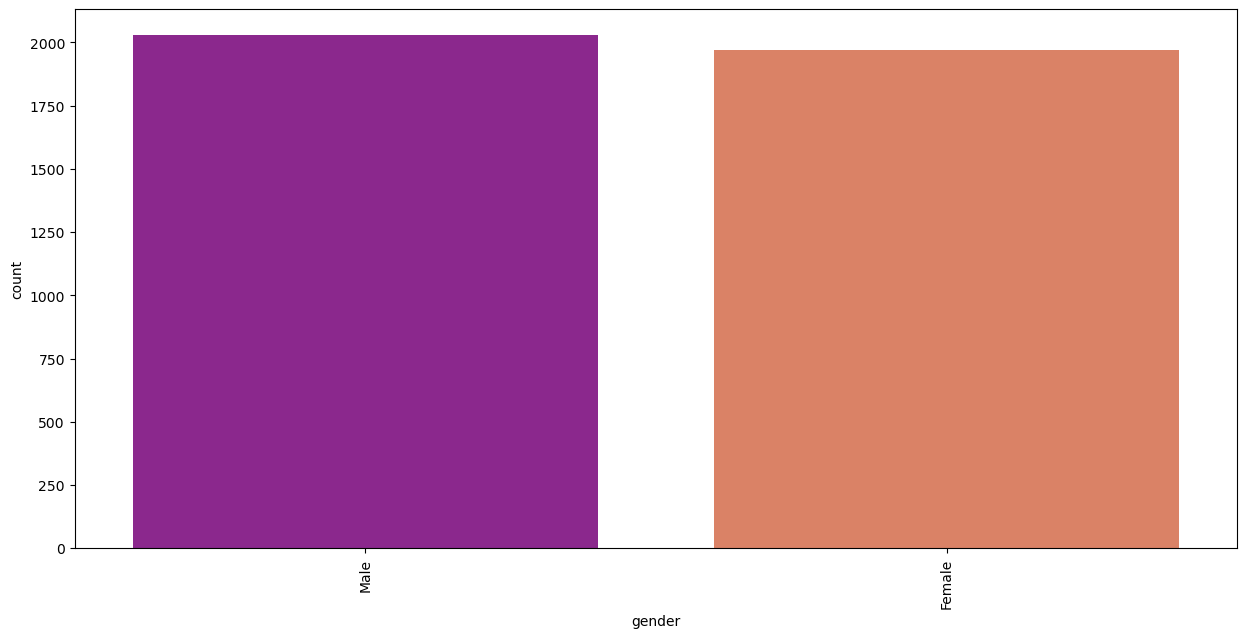

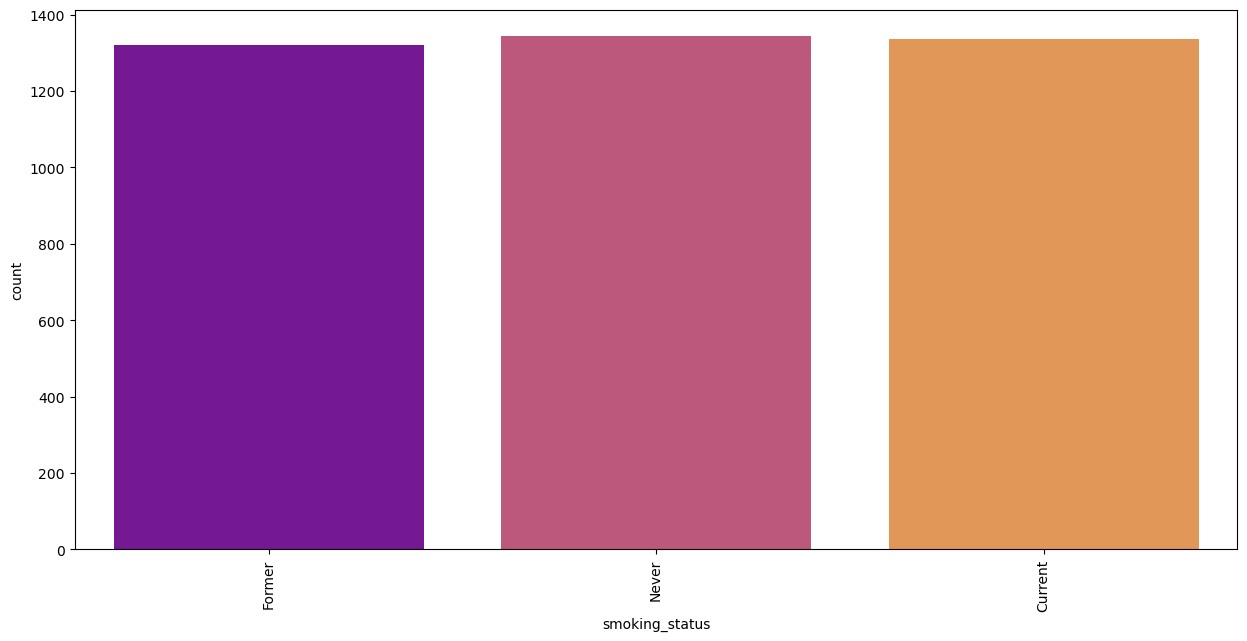

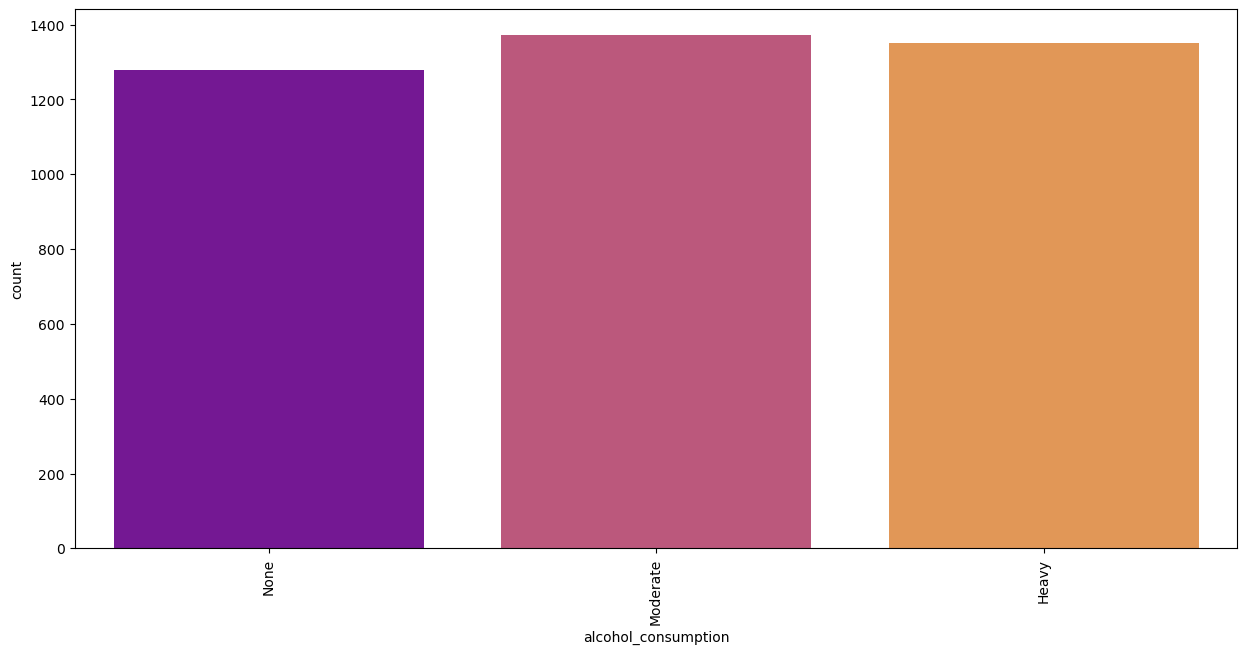

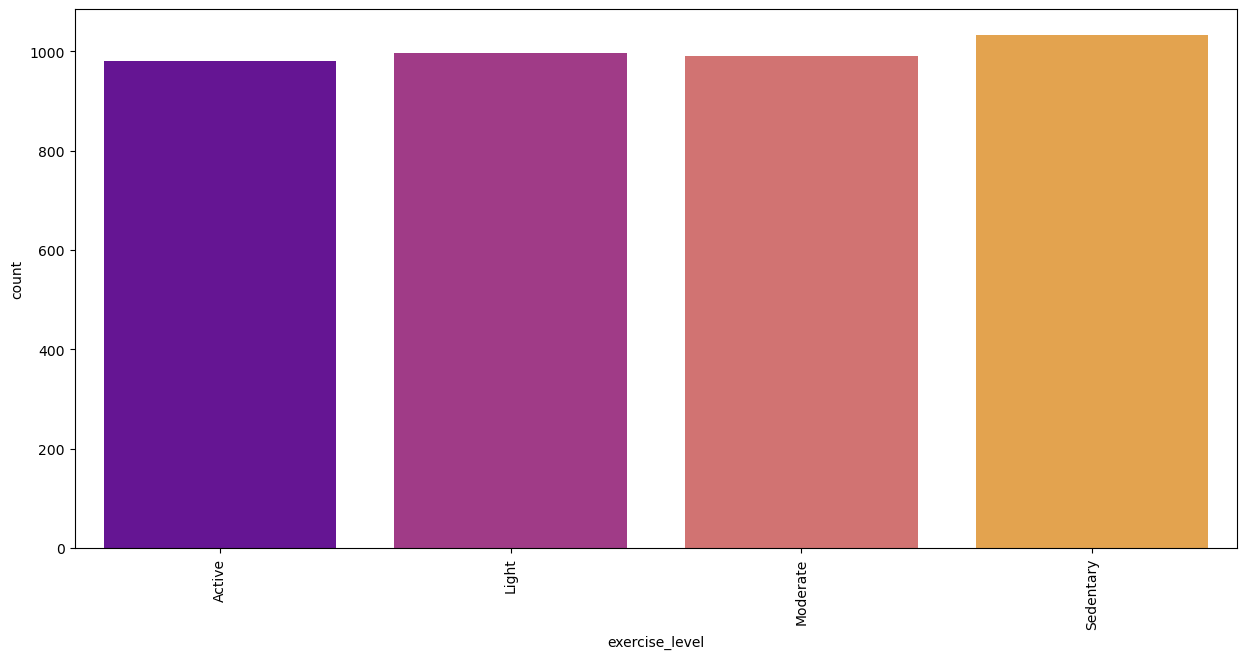

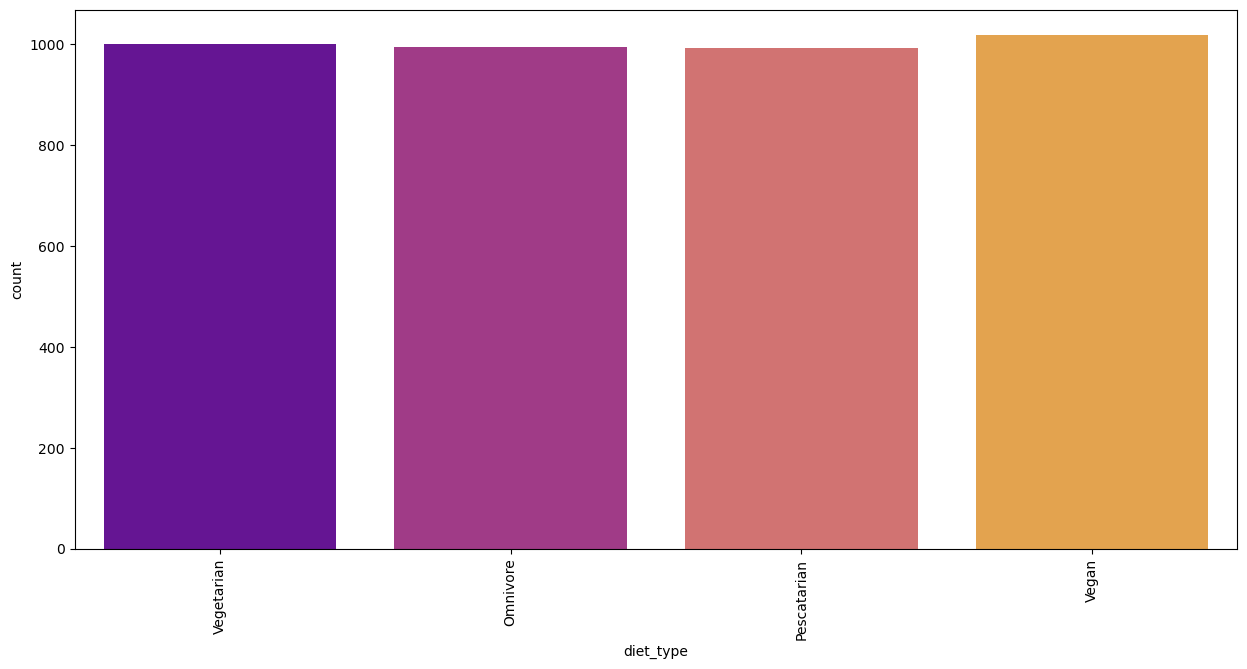

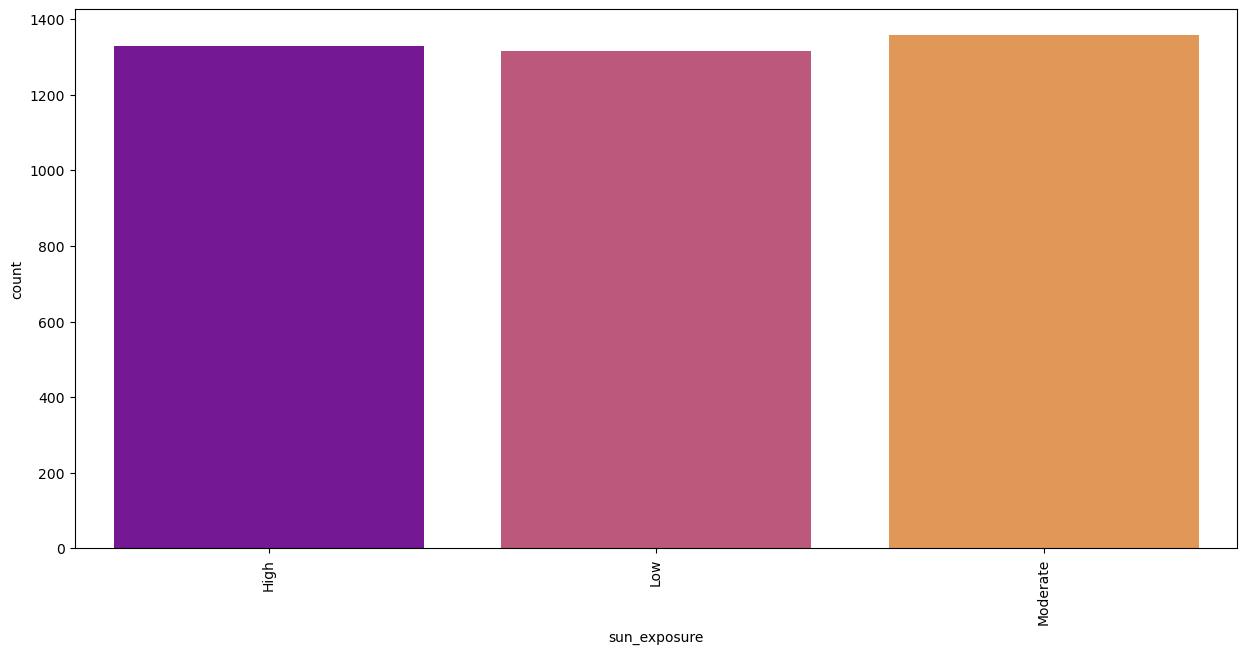

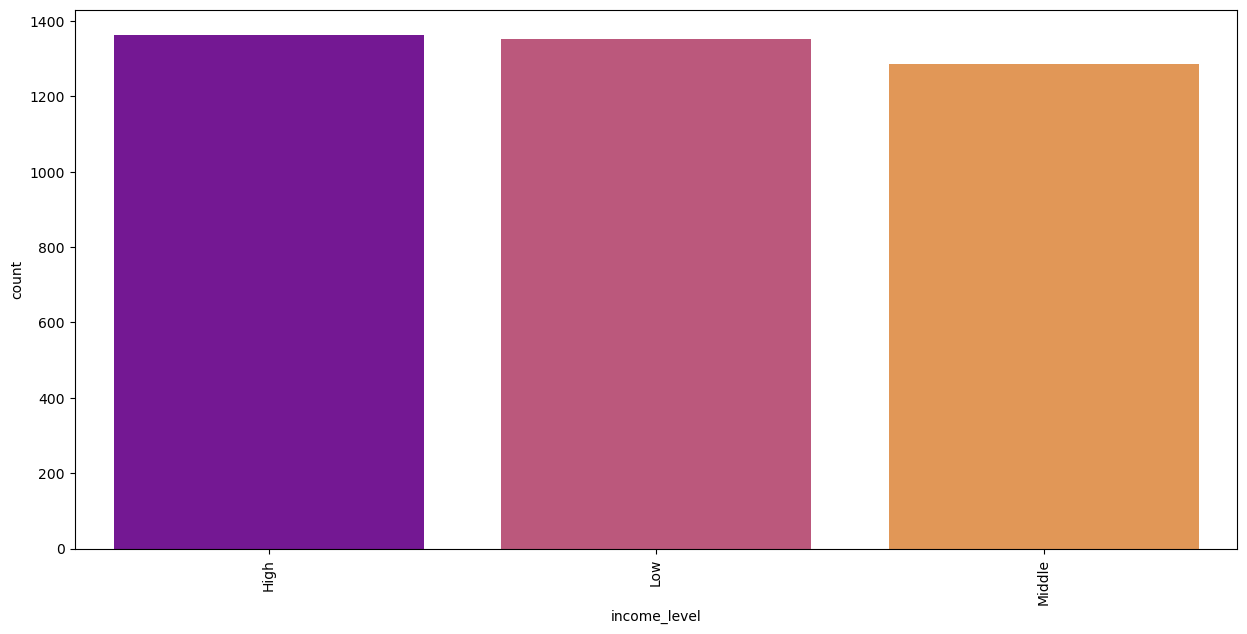

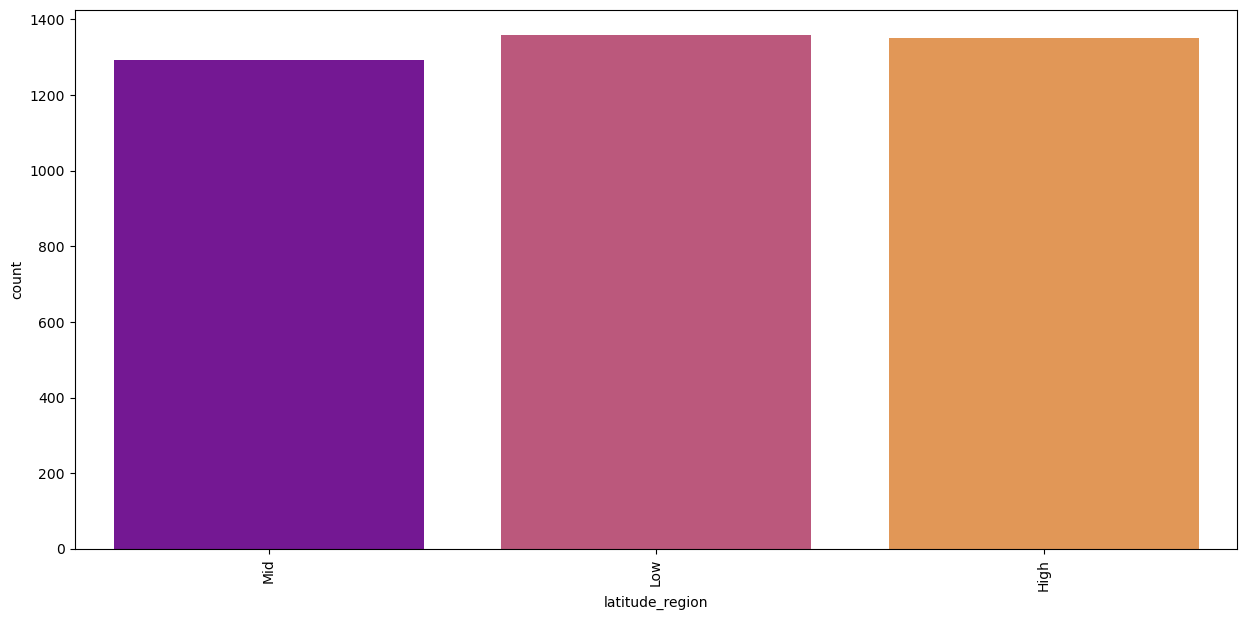

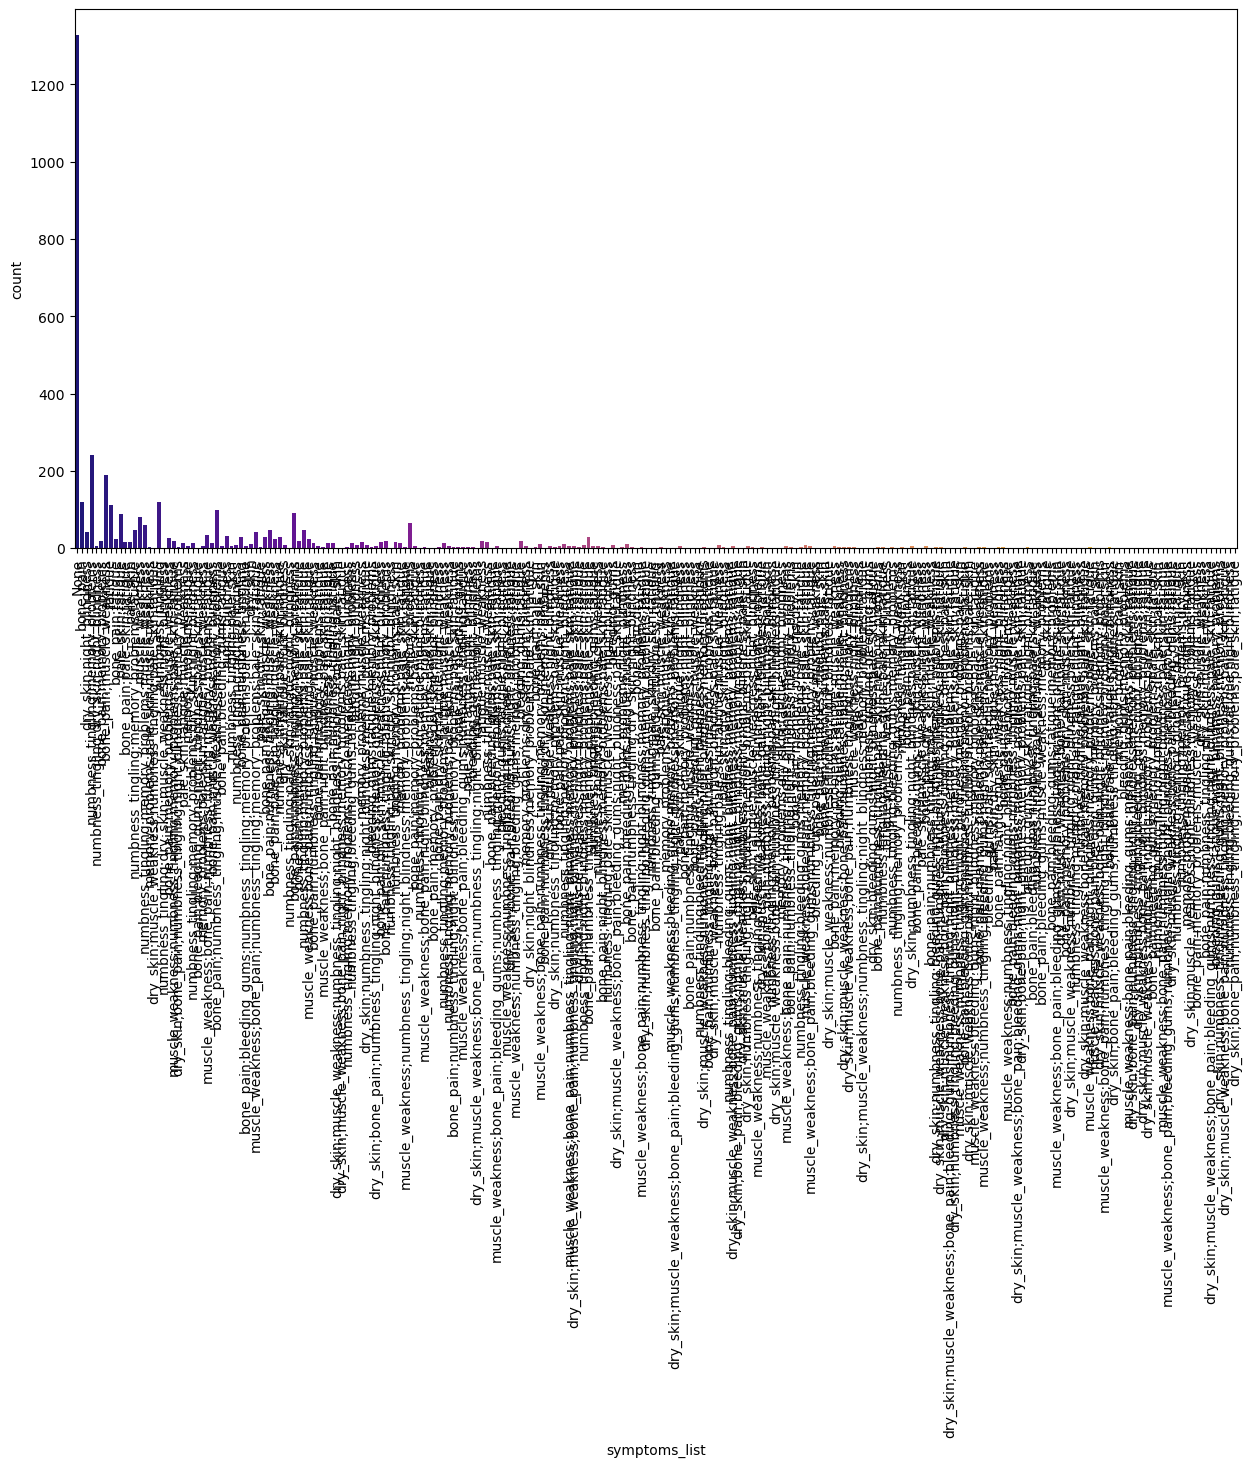

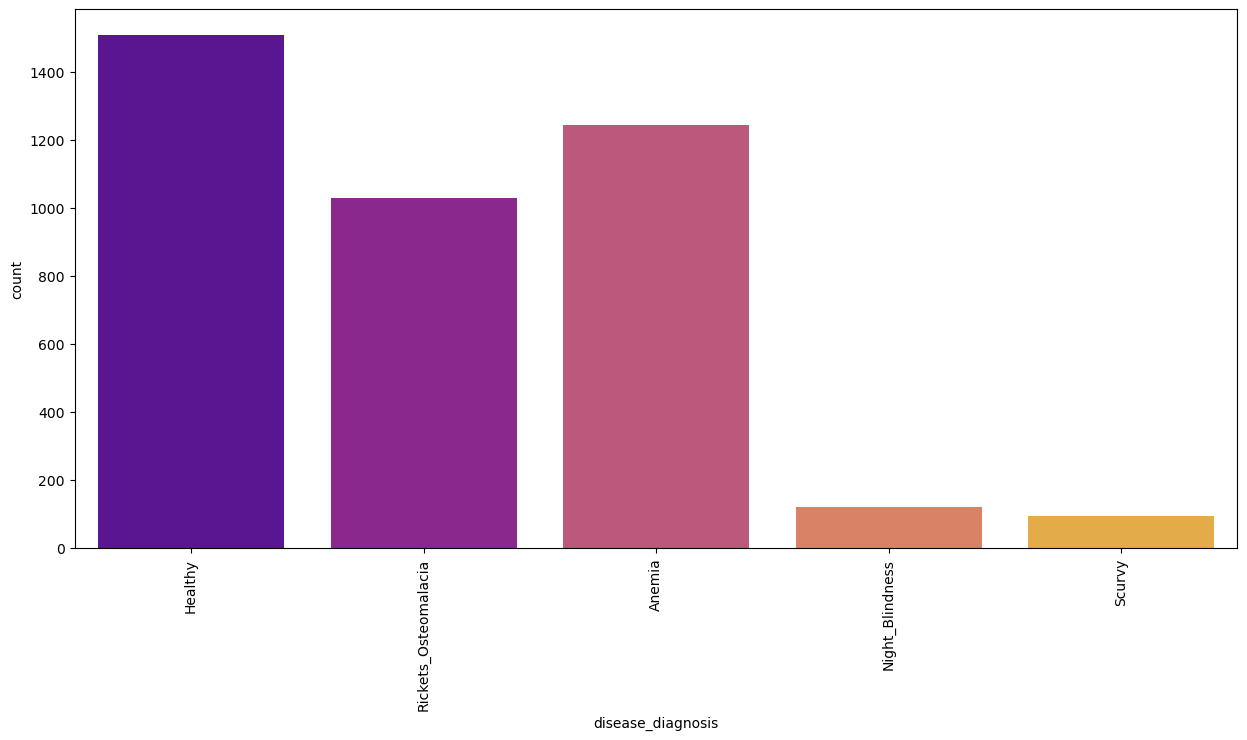

In [14]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df, x=col, palette="plasma")
    plt.xticks(rotation = "vertical")
for col in catvars:
    drawplot(col)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Rickets_Osteomalacia'),
  Text(2, 0, 'Anemia'),
  Text(3, 0, 'Night_Blindness'),
  Text(4, 0, 'Scurvy')])

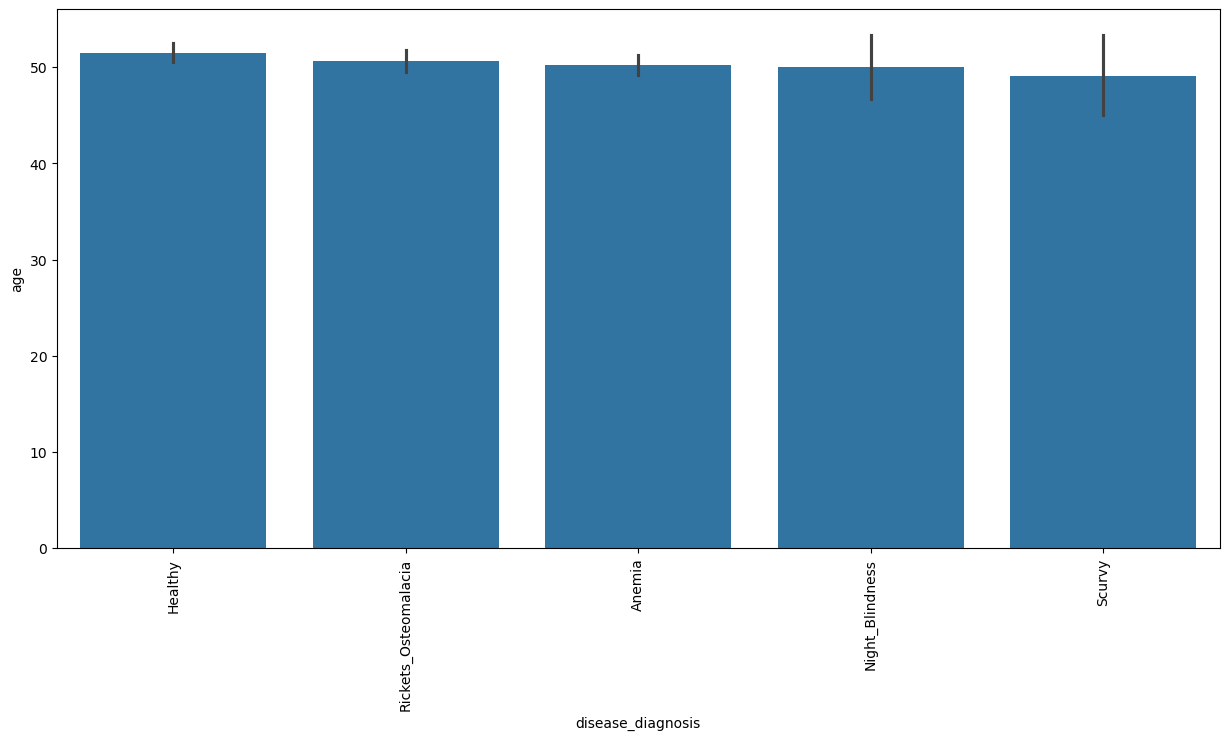

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['disease_diagnosis'], y=df['age'])
plt.xticks(rotation = 'vertical')

In [16]:
df.head()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count,symptoms_list,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,None,Active,Vegetarian,High,High,Mid,119.1,147.3,152.88,97.5,102.5,188.9,108.3,97.4,13.5,39.3,356.4,23.3,0.0,None,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.3,Former,Moderate,Light,Omnivore,Low,Low,Low,85.7,57.5,32.76,82.7,62.6,51.0,42.6,102.5,15.4,8.9,303.0,5.3,1.0,bone_pain,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,48.3,152.1,94.99,169.3,136.2,116.6,136.3,86.4,14.1,29.9,578.0,16.3,2.0,dry_skin;night_blindness,0,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,75.8,51.0,51.48,85.7,31.8,66.5,76.5,60.8,12.3,20.2,144.8,9.2,2.0,numbness_tingling;memory_problems,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,None,Moderate,Vegetarian,Moderate,High,Low,93.3,111.5,62.90,155.6,72.6,124.9,69.4,71.9,15.1,20.7,348.2,13.4,0.0,None,0,0,0,0,0,0,0,0,Healthy,0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Rickets_Osteomalacia'),
  Text(2, 0, 'Anemia'),
  Text(3, 0, 'Night_Blindness'),
  Text(4, 0, 'Scurvy')])

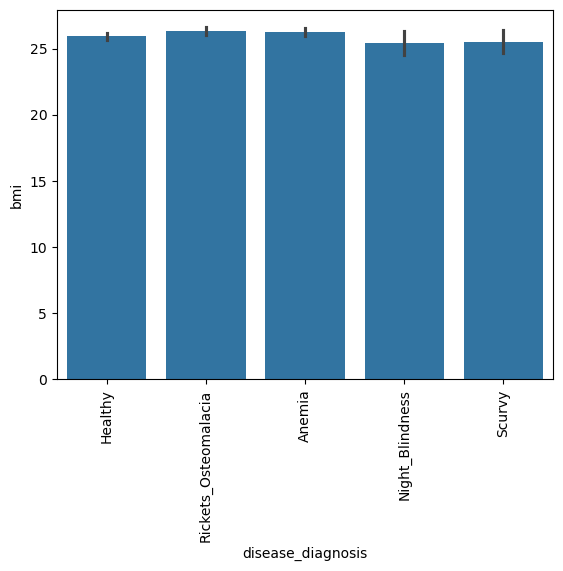

In [17]:

sns.barplot(x=df['disease_diagnosis'], y=df['bmi'])
plt.xticks(rotation = 'vertical')

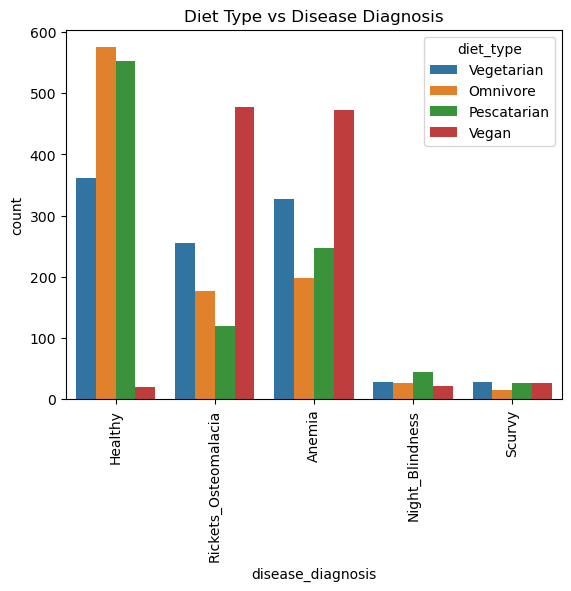

In [18]:
sns.countplot(x='disease_diagnosis', hue='diet_type', data=df)
plt.xticks(rotation='vertical')
plt.title('Diet Type vs Disease Diagnosis')
plt.show()



In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [20]:
target = "disease_diagnosis"

X = df.drop(target, axis=1)
y = df[target]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4000, 33)
Shape of y: (4000,)


In [21]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['gender', 'smoking_status', 'alcohol_consumption', 'exercise_level', 'diet_type', 'sun_exposure', 'income_level', 'latitude_region', 'symptoms_list']
Numeric columns: ['age', 'bmi', 'vitamin_a_percent_rda', 'vitamin_c_percent_rda', 'vitamin_d_percent_rda', 'vitamin_e_percent_rda', 'vitamin_b12_percent_rda', 'folate_percent_rda', 'calcium_percent_rda', 'iron_percent_rda', 'hemoglobin_g_dl', 'serum_vitamin_d_ng_ml', 'serum_vitamin_b12_pg_ml', 'serum_folate_ng_ml', 'symptoms_count', 'has_night_blindness', 'has_fatigue', 'has_bleeding_gums', 'has_bone_pain', 'has_muscle_weakness', 'has_numbness_tingling', 'has_memory_problems', 'has_pale_skin', 'has_multiple_deficiencies']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

In [24]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed train shape:", X_train_processed.shape)


Processed train shape: (3200, 262)


C:\Users\hruth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [25]:
df.replace("None", np.nan, inplace=True)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_processed, y_train
)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_smote.value_counts())

Before SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                   996
Rickets_Osteomalacia     823
Night_Blindness           98
Scurvy                    76
Name: count, dtype: int64

After SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                  1207
Rickets_Osteomalacia    1207
Night_Blindness         1207
Scurvy                  1207
Name: count, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_smote, y_train_smote)

log_pred = log_model.predict(X_test_processed)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.93625


In [28]:
# Transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train_processed, y_train
)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_smote.value_counts())

C:\Users\hruth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Before SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                   996
Rickets_Osteomalacia     823
Night_Blindness           98
Scurvy                    76
Name: count, dtype: int64

After SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                  1207
Rickets_Osteomalacia    1207
Night_Blindness         1207
Scurvy                  1207
Name: count, dtype: int64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_smote, y_train_smote)

log_pred = log_model.predict(X_test_processed)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.93625


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

dt_pred = dt_model.predict(X_test_processed)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9875


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

rf_pred = rf_model.predict(X_test_processed)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.96625


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

                      precision    recall  f1-score   support

              Anemia       0.97      0.95      0.96       249
             Healthy       0.99      0.97      0.98       302
     Night_Blindness       1.00      0.88      0.93        24
Rickets_Osteomalacia       0.93      1.00      0.96       206
              Scurvy       1.00      1.00      1.00        19

            accuracy                           0.97       800
           macro avg       0.98      0.96      0.97       800
        weighted avg       0.97      0.97      0.97       800



In [34]:
df.shape

(4000, 34)

In [35]:
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_smote.value_counts())

Before SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                   996
Rickets_Osteomalacia     823
Night_Blindness           98
Scurvy                    76
Name: count, dtype: int64

After SMOTE:
 disease_diagnosis
Healthy                 1207
Anemia                  1207
Rickets_Osteomalacia    1207
Night_Blindness         1207
Scurvy                  1207
Name: count, dtype: int64


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

rf_pred = rf_model.predict(X_test_processed)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.96625

Classification Report:

                      precision    recall  f1-score   support

              Anemia       0.97      0.95      0.96       249
             Healthy       0.99      0.97      0.98       302
     Night_Blindness       1.00      0.88      0.93        24
Rickets_Osteomalacia       0.93      1.00      0.96       206
              Scurvy       1.00      1.00      1.00        19

            accuracy                           0.97       800
           macro avg       0.98      0.96      0.97       800
        weighted avg       0.97      0.97      0.97       800



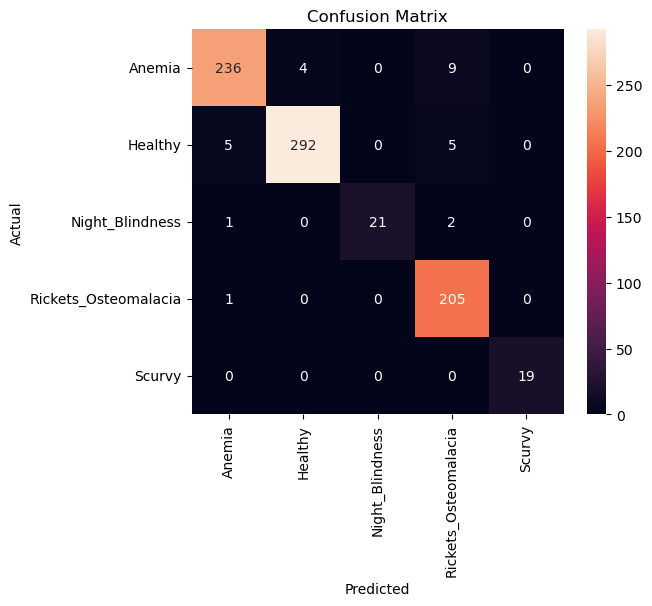

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
import joblib

# Save trained model
joblib.dump(rf_model, "rf_model.pkl")

# Save preprocessing pipeline
joblib.dump(preprocessor, "preprocessor.pkl")

print("Model and Preprocessor saved successfully!")

Model and Preprocessor saved successfully!


In [39]:
print(df.columns.tolist())

['age', 'gender', 'bmi', 'smoking_status', 'alcohol_consumption', 'exercise_level', 'diet_type', 'sun_exposure', 'income_level', 'latitude_region', 'vitamin_a_percent_rda', 'vitamin_c_percent_rda', 'vitamin_d_percent_rda', 'vitamin_e_percent_rda', 'vitamin_b12_percent_rda', 'folate_percent_rda', 'calcium_percent_rda', 'iron_percent_rda', 'hemoglobin_g_dl', 'serum_vitamin_d_ng_ml', 'serum_vitamin_b12_pg_ml', 'serum_folate_ng_ml', 'symptoms_count', 'symptoms_list', 'has_night_blindness', 'has_fatigue', 'has_bleeding_gums', 'has_bone_pain', 'has_muscle_weakness', 'has_numbness_tingling', 'has_memory_problems', 'has_pale_skin', 'disease_diagnosis', 'has_multiple_deficiencies']
